# MATH 210 Introduction to Mathematical Computing

## November 26, 2018

* Euler's method
* scipy.integrate.odeint
* Higher order equations
* Systems of equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler's method

Let's write a function called `euler` which takes 3 input parameters `odefun`, `y0` and `t` where:

* `odefun` is a function of 2 variables `odefun(y,t)` which represents the right side of a first order differential equation `y' = odefun(y,t)`.
* `y0` is an intial value $y(t_0)=y_0$ where $t_0$ is the entry at index 0 of the array `t`.
* `t` is a 1D NumPy array of t values where we are approximating y values.

The function returns a 1D NumPy array of y values.

In [2]:
def euler(odefun,y0,t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + odefun(y[n],t[n])*(t[n+1] - t[n])
    return y

## Example

Let's plot an approximation of $y'=y^2$ for $y(0)=-1$. We know the solutions is

$$
y(t) = \frac{-1}{t+1}
$$

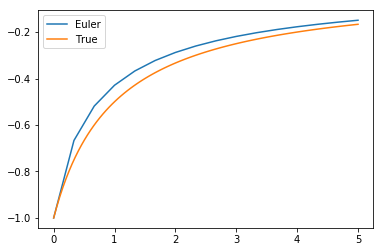

In [3]:
t = np.linspace(0,5,16)
y0 = -1

def odefun(y,t):
    return y**2

y = euler(odefun,y0,t)
t_true = np.linspace(0,5,100)
y_true = -1/(t_true + 1)
plt.plot(t,y,t_true,y_true)
plt.legend(['Euler','True'])
plt.show()

## scipy.integrate.odeint

The general ODE solver in SciPy is [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). It works in a similar way to our `euler` function.

In [4]:
import scipy.integrate as spi

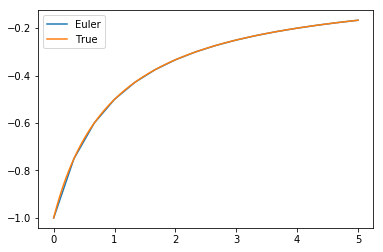

In [5]:
t = np.linspace(0,5,16)
y0 = -1

def odefun(y,t):
    return y**2

y = spi.odeint(odefun,y0,t)
t_true = np.linspace(0,5,100)
y_true = -1/(t_true + 1)
plt.plot(t,y,t_true,y_true)
plt.legend(['Euler','True'])
plt.show()

## Higher order equations

ODE solvers always expect the input to be a first order system (or equation). For example, if we have a second order constant equation

$$
ay'' + by' + cy = f(t)
$$

we need to rewrite this as a 2-dimensional first order system by introducing new variables $u_0 = y$ and $u_1 = y'$:

\begin{align*}
u'_0 &= u_1 \\
u'_1 &= (1/a)(-cu_0-bu_1+f(t))
\end{align*}

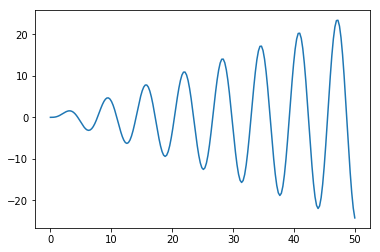

In [6]:
a = 1; b = 0; c = 1;
f = lambda t: np.sin(t)

def odefun(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = (1/a)*(-c*u[0] - b*u[1] + f(t))
    return dudt

u0 = np.array([0,0])
t = np.linspace(0,50,200)
u = spi.odeint(odefun,u0,t)
plt.plot(t,u[:,0])
plt.show()